In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
#standardize
sc = StandardScaler()
x_test = sc.fit_transform(x_test)
x_train = sc.fit_transform(x_train)

In [4]:
from sklearn.ensemble import RandomForestClassifier

#random forest is aggregated decision trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)
#estimators is the number of times we are running the model
rf = rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.7489177489177489

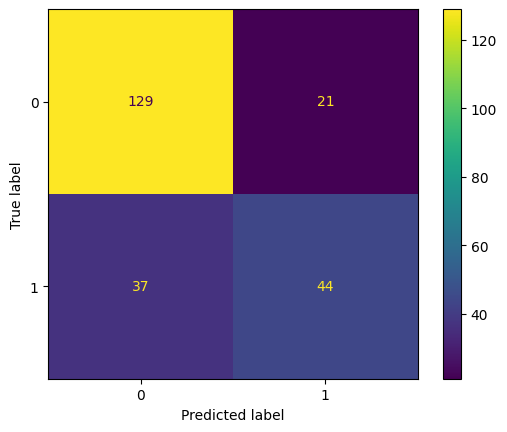

In [5]:
ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test)

In [7]:
44/(37+44)
#this is our recall

0.5432098765432098

In [9]:
#we can oversample if the minority class is smaller by a significant amount
print(rf.feature_importances_, x.columns)
#feature importances lets you know what the model thinks is the most important predictor, anything over 0.1 is very important

[0.09694392 0.27216109 0.08907904 0.0691244  0.07307654 0.1513202
 0.11830601 0.12998879] Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


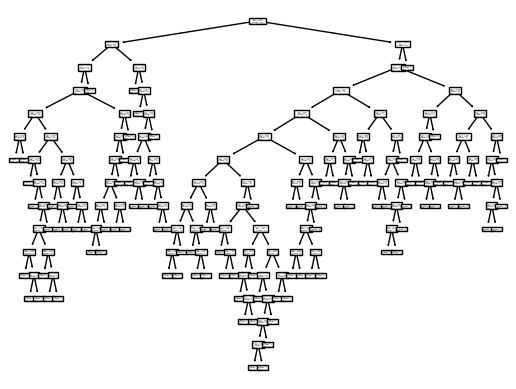

In [10]:
import matplotlib.pyplot as plt
rf_tree = rf.estimators_[4]
tree.plot_tree(rf_tree)
plt.savefig("rf_tree.svg")

In [11]:
%pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 1.8/124.9 MB 11.2 MB/s eta 0:00:11
   -- ------------------------------------- 6.3/124.9 MB 16.8 MB/s eta 0:00:08
   -- ------------------------------------- 8.9/124.9 MB 15.8 MB/s eta 0:00:08
   --- ------------------------------------ 10.2/124.9 MB 14.2 MB/s eta 0:00:09
   ---- ----------------------------------- 12.6/124.9 MB 12.7 MB/s eta 0:00:09
   ---- ----------------------------------- 14.2/124.9 MB 11.9 MB/s eta 0:00:10
   ----- ---------------------------------- 15.7/124.9 MB 11.1 MB/s eta 0:00:10
   ----- ---------------------------------- 17.6/124.9 MB 10.6 MB/s eta 0:00:11
   ------ --------------------------------- 19.1/124.9 MB 10.3 MB/s eta 0:00:11
   ------ --------------------------------- 21.0/124.9 MB 10.0 MB/s eta 0:00:11
   ------- -------------------------------- 22.5/124.9 MB 9.8 MB/s eta 0:00:11
   ------- -------------------------------- 24.6/124.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

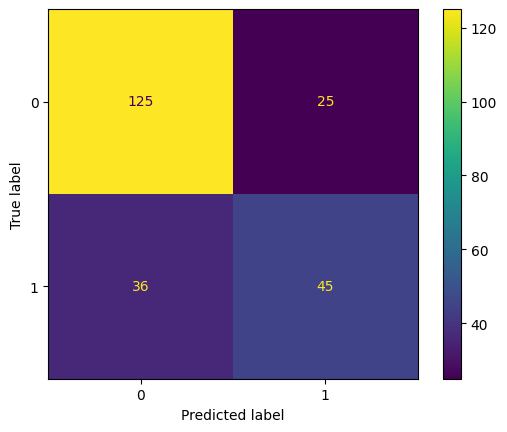

In [13]:
ConfusionMatrixDisplay.from_estimator(xgb, x_test, y_test)

In [14]:
45/(36+45)

0.5555555555555556

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
#ROC = receiving operating characteristic curve
#roc curves summarize the tradeoff between true positives and false positives
#they are most appropriate for balanced datasets
#can be overly optimistic for severely imbalanced classification problems
print(type(y_test))
print(type(y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(fpr, tpr)
auc

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[0.         0.16666667 1.        ] [0.         0.55555556 1.        ]


np.float64(0.6944444444444444)

Text(0, 0.5, 'true positive')

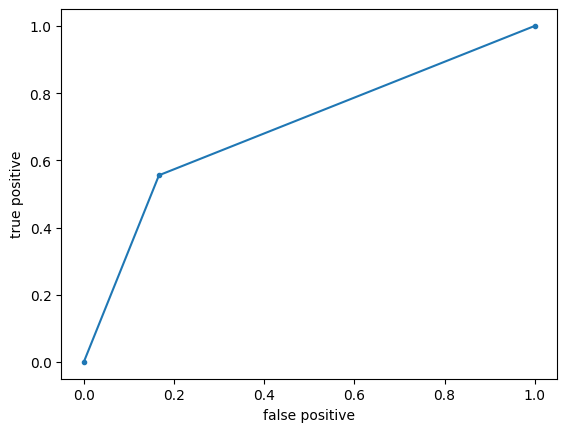

In [16]:
plt.plot(fpr, tpr, marker = '.')
plt.xlabel('false positive')
plt.ylabel('true positive')

In [17]:
from sklearn.metrics import precision_recall_curve, f1_score, auc
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
pr_auc

np.float64(0.6771284271284271)

Text(0, 0.5, 'precision')

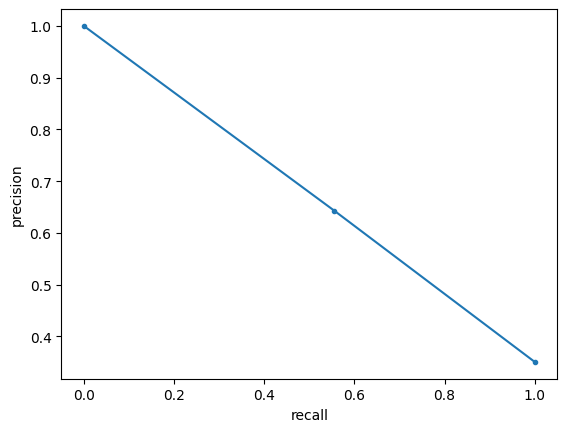

In [18]:
plt.plot(recall, precision, marker = '.')
plt.xlabel('recall')
plt.ylabel('precision')

In [21]:
#f1 score = 2*precision*recall/(precision+recall)
#combined precision and recall are used to compute how well a model does across the entire dataset
f1 = f1_score(y_test, y_pred)
f1

np.float64(0.5960264900662252)